In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving eda_data.csv to eda_data.csv


In [3]:
df = pd.read_csv('eda_data.csv')

In [5]:
df.head()

,datetime,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description,icon,stations
0,1971-01-01,United States,33.6,25.6,30.2,25.0,15.1,19.6,22.8,73.8,...,1007.2,69.6,4.6,1971-01-01T07:26:54,1971-01-01T16:56:27,0.15,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"72403793728,74594013705"
1,1971-01-02,United States,38.6,21.3,29.9,38.6,14.7,27.2,19.8,66.2,...,1021.2,64.9,6.8,1971-01-02T07:27:02,1971-01-02T16:57:15,0.19,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72403793728,74594013705"
2,1971-01-03,United States,38.3,21.3,29.5,38.3,21.3,28.6,22.7,76.3,...,1026.3,33.7,6.4,1971-01-03T07:27:09,1971-01-03T16:58:06,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72403793728,74594013705"
3,1971-01-04,United States,41.0,30.6,35.9,41.0,27.2,34.3,33.3,90.1,...,1018.1,99.7,1.7,1971-01-04T07:27:12,1971-01-04T16:58:58,0.26,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"72403793728,74594013705"
4,1971-01-05,United States,44.5,34.3,40.3,41.5,27.2,34.7,30.8,69.7,...,1014.6,97.0,5.1,1971-01-05T07:27:14,1971-01-05T16:59:51,0.29,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"72403793728,74594013705"


In [6]:
df.isnull().sum()

datetime            0
name                0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

In [10]:
df.dtypes

datetime             object
name                 object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [16]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [17]:
df.set_index('datetime', inplace = True)
df.sort_index(inplace = True)

df.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
1971-01-01,United States,33.6,25.6,30.2,25.0,15.1,19.6,22.8,73.8,0.460,...,1007.2,69.6,4.6,1971-01-01T07:26:54,1971-01-01T16:56:27,0.15,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"72403793728,74594013705"
1971-01-02,United States,38.6,21.3,29.9,38.6,14.7,27.2,19.8,66.2,0.000,...,1021.2,64.9,6.8,1971-01-02T07:27:02,1971-01-02T16:57:15,0.19,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72403793728,74594013705"
1971-01-03,United States,38.3,21.3,29.5,38.3,21.3,28.6,22.7,76.3,0.000,...,1026.3,33.7,6.4,1971-01-03T07:27:09,1971-01-03T16:58:06,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72403793728,74594013705"
1971-01-04,United States,41.0,30.6,35.9,41.0,27.2,34.3,33.3,90.1,0.800,...,1018.1,99.7,1.7,1971-01-04T07:27:12,1971-01-04T16:58:58,0.26,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"72403793728,74594013705"
1971-01-05,United States,44.5,34.3,40.3,41.5,27.2,34.7,30.8,69.7,0.306,...,1014.6,97.0,5.1,1971-01-05T07:27:14,1971-01-05T16:59:51,0.29,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"72403793728,74594013705"


In [18]:
features = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'moonphase']
X = df[features]
y = df['precip']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [20]:
X_train.tail()

,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
datetime,,,,,,,,,,,
2009-09-19,75.9,45.5,61.0,39.4,49.9,15.8,170.0,1021.7,31.4,22.7,0.03
2009-09-20,80.0,52.0,63.2,37.0,40.7,16.8,237.6,1016.7,46.5,25.0,0.06
2009-09-21,50.0,36.2,42.6,36.4,79.4,21.0,359.1,1024.7,86.4,10.0,0.10
2009-09-22,47.8,37.9,42.0,32.5,70.1,19.9,331.9,1027.5,93.6,11.9,0.13
2009-09-23,43.3,39.4,41.2,36.9,84.9,11.5,321.8,1026.9,97.1,8.0,0.16


In [21]:
X_test.head()

,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
datetime,,,,,,,,,,,
2009-09-24,57.2,38.4,47.0,38.3,74.0,11.4,288.5,1023.3,85.4,13.6,0.19
2009-09-25,60.6,44.0,50.9,41.4,72.4,11.4,287.2,1021.4,75.2,14.2,0.25
2009-09-26,80.9,45.1,62.2,31.7,38.1,12.4,228.8,1020.7,9.2,25.4,0.26
2009-09-27,76.0,48.0,63.6,29.8,29.8,15.2,106.3,1018.4,4.3,20.7,0.29
2009-09-28,67.5,37.3,51.9,34.0,53.3,13.5,159.3,1023.8,7.2,20.8,0.32


In [23]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [24]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length = 3,
                                      batch_size = 64)

In [25]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length = 3, batch_size = 64)

In [27]:
input_shape = train_sequences[0][0][0].shape

In [34]:
model = Sequential()

model.add(GRU(8, input_shape = input_shape, return_sequences = True)) # True when next layer is also RNN

model.add(GRU(8, return_sequences = False)) # False is next layer is Dense/Not RNN

model.add(Dense(4, activation = 'relu'))

model.add(Dense(1, activation = None))
# I want to add r2 as metric but HOW!?

In [35]:
model.compile(loss = 'mean_squared_error',
              optimizer = Adam(learning_rate = 0.005), metrics = 'mse')

history = model.fit(train_sequences,
                    validation_data = test_sequences,
                    epochs = 50)

Epoch 1/50
218/218 [==============================] - 7s 10ms/step - loss: 0.0698 - mse: 0.0698 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2/50
218/218 [==============================] - 2s 9ms/step - loss: 0.0664 - mse: 0.0664 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 3/50
218/218 [==============================] - 1s 6ms/step - loss: 0.0656 - mse: 0.0656 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 4/50
218/218 [==============================] - 1s 6ms/step - loss: 0.0652 - mse: 0.0652 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 5/50
218/218 [==============================] - 2s 7ms/step - loss: 0.0653 - mse: 0.0653 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 6/50
218/218 [==============================] - 2s 7ms/step - loss: 0.0645 - mse: 0.0645 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 7/50
218/218 [==============================] - 2s 9ms/step - loss: 0.0641 - mse: 0.0641 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 8/50
218/218 [==============================] - 2s 8ms/step - loss: 0

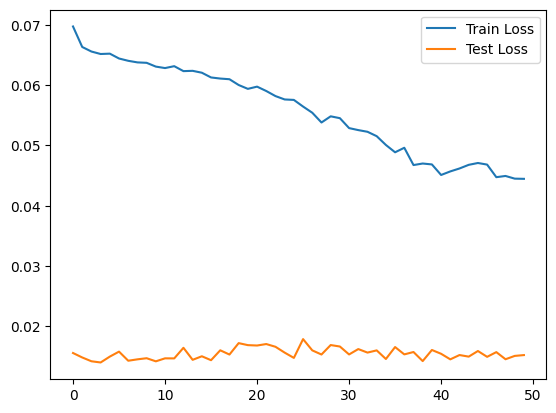

In [36]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()